In [3]:
import matplotlib.pyplot as plt
from skimage import *
import numpy as np
from skimage.viewer import ImageViewer
from tifffile import * 
import matplotlib.patches as mpatches   

In [5]:
red =io.imread('tiffiles/B4.tif')
nir = io.imread('tiffiles/B5.tif')
# X,Y size of images 
print("Size of Red Band: ",red.shape)
print("Size of Red Band: ",nir.shape)

Size of Red Band:  (562, 715, 4)
Size of Red Band:  (562, 715, 4)


In [6]:
#Pixel values of Red Band which is 4th band of the Landsat 8 image
values = np.unique(red.ravel())
values

array([  0,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

In [7]:
#Pixel values of NIR Band which is 5th band of the Landsat 8 image
values = np.unique(nir.ravel())
values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

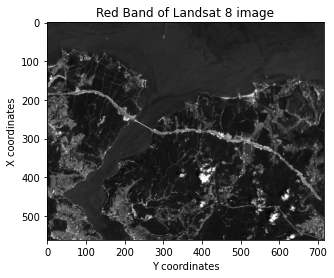

In [8]:
#Plotting of Red Band
plt.title("Red Band of Landsat 8 image")
plt.xlabel("Y coordinates")
plt.ylabel("X coordinates")
plt.imshow(red)
plt.show()

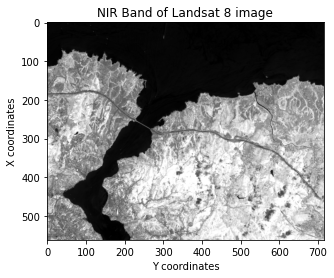

In [9]:
#Plotting of NIR Band
plt.title("NIR Band of Landsat 8 image")
plt.xlabel("Y coordinates")
plt.ylabel("X coordinates")
plt.imshow(nir)
plt.show()

In [10]:
# Calculating NDVI for each input pixels
ndvi = (nir - red)/ (nir + red)
print("Data type: ",ndvi.dtype)
print("max before cleaning: ",ndvi.max())
print("min before cleaning: ",ndvi.min())

#Cleaning NaN
ndvi= np.nan_to_num(ndvi)

print("max after cleaning: ",ndvi.max())
print("min after cleaning: ",ndvi.min())


Data type:  float64
max before cleaning:  nan
min before cleaning:  nan
max after cleaning:  1.7976931348623157e+308
min after cleaning:  0.0


In [11]:
res = (ndvi*255).astype('uint8')
print("Data type: ",res.dtype)
print("max before cleaning: ",res.max())
print("min before cleaning: ",res.min())

res

Data type:  uint8
max before cleaning:  255
min before cleaning:  0


array([[[239, 239, 239,   0],
        [239, 239, 239,   0],
        [239, 239, 239,   0],
        ...,
        [136, 136, 136,   0],
        [217, 217, 217,   0],
        [ 18,  18,  18,   0]],

       [[239, 239, 239,   0],
        [185, 185, 185,   0],
        [239, 239, 239,   0],
        ...,
        [217, 217, 217,   0],
        [217, 217, 217,   0],
        [ 18,  18,  18,   0]],

       [[155, 155, 155,   0],
        [206, 206, 206,   0],
        [239, 239, 239,   0],
        ...,
        [ 80,  80,  80,   0],
        [ 54,  54,  54,   0],
        [ 18,  18,  18,   0]],

       ...,

       [[185, 185, 185,   0],
        [178, 178, 178,   0],
        [167, 167, 167,   0],
        ...,
        [  0,   0,   0,   0],
        [164, 164, 164,   0],
        [177, 177, 177,   0]],

       [[187, 187, 187,   0],
        [194, 194, 194,   0],
        [158, 158, 158,   0],
        ...,
        [192, 192, 192,   0],
        [178, 178, 178,   0],
        [187, 187, 187,   0]],

       [[162

In [12]:
img = res[:, :, 1]
print(img.shape)
values = np.unique(img.ravel())
values


(562, 715)


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

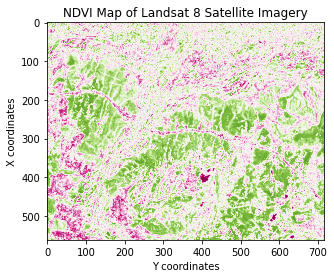

In [13]:
# Plotting of the result map
"""interaktif yap ilk ve son nasıl yan yana oluyo subplot muhtemelen"""
"""su alanları mask nasıl olacak!!!!"""
plt.title("NDVI Map of Landsat 8 Satellite Imagery")
plt.xlabel("Y coordinates")
plt.ylabel("X coordinates")
plt.imshow(img,cmap='PiYG',vmin=0,vmax=255)
plt.savefig('outputs/NDVI.png',format="png",dpi=1000)
plt.show()


In [14]:
"AFTER MASK process py importla"

'AFTER MASK process py importla'